## Breast cancer detection project. 
The idea of this project is to predict if a cell is malignant (cancerous) or benign (healthy). 

We are going to use KNN (K-nearest neighbor) and Support Vector Machine (SVM) machine learning algorithms.

The dataset for this project is from UCI machine learning repository: 
"Breast Cancer Wisconsin (Original) data set" 

LINK Of the dataset: - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29. 

****************************************************
### *Let us glance at the dataset a little bit*

This dataset was put together by the sample cases provided by Dr. Wolberg, through the years of 1989-1991.

The total instances reported in the dataset : 699

Attributes information (copied directly from the website):
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

**Make note of the fact that for a benign tissue the TARGET is 2 and for Malignant the Target is 4**
*****************************************************

<h3>
Well, now Dr. Wolberg and the team are doing their bit in fighting cancer. We as Data Scientists can also help them by using machine learning models to find trends to indentify these suckers called cancerous cells. We are going to make two different models and compare them to find the better one and suggest the doctors team to use it to predict the cancerous cells.
</h3>

SO LET US GET STARTED

### Import the relevant packages 
(This is of course the first thing to get the ball rolling 😀)

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data in training and testing samples.
from sklearn.model_selection import train_test_split

# to use KNN classfier
from sklearn.neighbors import KNeighborsClassifier

# to use SV classifier
from sklearn.svm import SVC

# to compare the classificaton and get the reports
from sklearn.metrics import classification_report, confusion_matrix

### Bring the data in
The data is saved in the "DATA" folder.  

In [60]:
df = pd.read_csv("./Data/BreastCancerDetection/breast-cancer-data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


We see that there are no column names in the data. We are going to add the column names using the detail of the data columns that we got from the UCI repository website.

In [61]:
# let's grab the attribute information from the one of the top cells of this notebook 
# and then constitute the list, column names. and then pitch it in the pandas dataframe that we created. 
column_names = ["id", "Clump_Thickness", "CellSize_Uniformity", "CellShape_Uniformity", "Marginal_Adhesion","Epithelial_CellSize", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]

# add column names to dataframe
df.columns = column_names

# see first five rows of the dataframe
df.head()

,id,Clump_Thickness,CellSize_Uniformity,CellShape_Uniformity,Marginal_Adhesion,Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Great, now the data looks better with all the attribute details as column names 

### Data pre-processing

In [62]:
# First thing that we want to do is to see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    699 non-null    int64 
 1   Clump_Thickness       699 non-null    int64 
 2   CellSize_Uniformity   699 non-null    int64 
 3   CellShape_Uniformity  699 non-null    int64 
 4   Marginal_Adhesion     699 non-null    int64 
 5   Epithelial_CellSize   699 non-null    int64 
 6   Bare_Nuclei           699 non-null    object
 7   Bland_Chromatin       699 non-null    int64 
 8   Normal_Nucleoli       699 non-null    int64 
 9   Mitoses               699 non-null    int64 
 10  Class                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [63]:
# we see that all columns are of int64 type, only "Bare_Nuclei" seems to be of wrong type of "object"
# this could mean that there is somethin in this column that is preventing it to be of integer type

# to find out let us see first 50 columns of the dataset
df.Bare_Nuclei.head(50)

# After eye-balling the dataset we see that there are question marks in the data, that is preventing it from being an integer column

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     ?
24     1
25     7
26     1
27     1
28     1
29     1
30     1
31     1
32     5
33     1
34     1
35     1
36     1
37     1
38    10
39     7
40     ?
41     3
42    10
43     1
44     1
45     1
46     9
47     1
48     1
49     8
Name: Bare_Nuclei, dtype: object

In [64]:
# another way of dealing these kind of dataset is use the sum() function to find out any abnormalities.
df.sum()

id                                                              749121165
Clump_Thickness                                                      3088
CellSize_Uniformity                                                  2191
CellShape_Uniformity                                                 2242
Marginal_Adhesion                                                    1962
Epithelial_CellSize                                                  2248
Bare_Nuclei             1102411010111113391111011071?17111111511111107...
Bland_Chromatin                                                      2403
Normal_Nucleoli                                                      2004
Mitoses                                                              1111
Class                                                                1880
dtype: object

From the above output we see that the column Bare_Nuclei doesn't provide a summed up value, and also there is a quesiton mark in between. That could give you a hint that something is wrong with this column. 

In [65]:
# At this point what we can do is, see all the data which has "?" in the "Bare_Nuclei" column
df[df["Bare_Nuclei"]=="?"]
#df[df["Bare_Nuclei"] == "?"].shape

,id,Clump_Thickness,CellSize_Uniformity,CellShape_Uniformity,Marginal_Adhesion,Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


We can either drop these data points to get rid of them and move on with the remaining datapoints but this should always be the last resort for a data-scientist.

In stead we are going to replace these "?" with the median of the columns.

In [81]:
# First find out what are the mean values of the columns
# but we cannot yet get the mean values of the column "Bare_Nuclei" since the "?" doesn't comply with the datatype. So we are going to replace it with "NaN", because python understands NaN. 
data = df.replace(to_replace='?', value=np.nan)

# then we will fill the NaN with the medians

# print the medians first
print(data.median())

# we see that the median for the "Bare_Nuclei" column is 1.0
data = data.fillna(data.median())
data.head()

id                      1171710.0
Clump_Thickness               4.0
CellSize_Uniformity           1.0
CellShape_Uniformity          1.0
Marginal_Adhesion             1.0
Epithelial_CellSize           2.0
Bare_Nuclei                   1.0
Bland_Chromatin               3.0
Normal_Nucleoli               1.0
Mitoses                       1.0
Class                         2.0
dtype: float64


,id,Clump_Thickness,CellSize_Uniformity,CellShape_Uniformity,Marginal_Adhesion,Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [83]:
# finally check the our data one last time.
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype('int64')
data.dtypes

id                      int64
Clump_Thickness         int64
CellSize_Uniformity     int64
CellShape_Uniformity    int64
Marginal_Adhesion       int64
Epithelial_CellSize     int64
Bare_Nuclei             int64
Bland_Chromatin         int64
Normal_Nucleoli         int64
Mitoses                 int64
Class                   int64
dtype: object

### Data Analysis

In [85]:
# check the data
data.head()

,id,Clump_Thickness,CellSize_Uniformity,CellShape_Uniformity,Marginal_Adhesion,Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


We can see that the first column "id" is something that we don't need for our ML models. So we are going to drop it

In [86]:
data.drop('id', axis=1, inplace=True)
data.head()

,Clump_Thickness,CellSize_Uniformity,CellShape_Uniformity,Marginal_Adhesion,Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
CellSize_Uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
CellShape_Uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Epithelial_CellSize,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


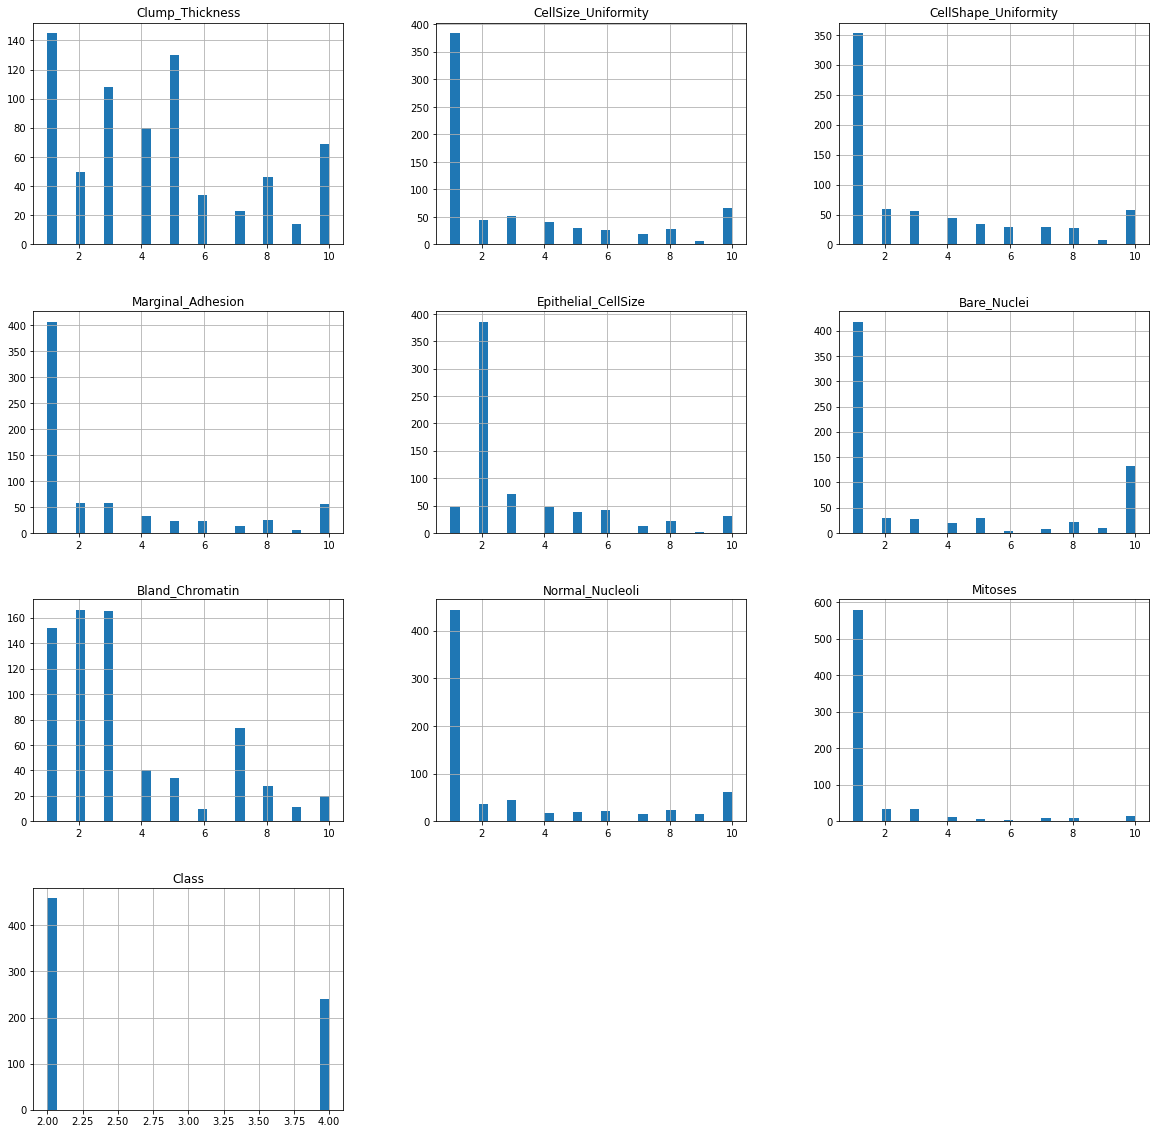

In [105]:
# TO visualize the data first thing we can do it check the histogram for all the columns here
data.hist(bins=30, figsize=(20, 20));

We can see in the last graph that the Class column (which is our target) has two values at 2 (for benign) and 4 (for malignant) with differnt values.
We can also gain some insight by checking the fact that the value 1 is very common among all these columns and the values span from 1 to 10. Which we already saw by using the describe function. But it always good to use data visualization to check these senarios.  

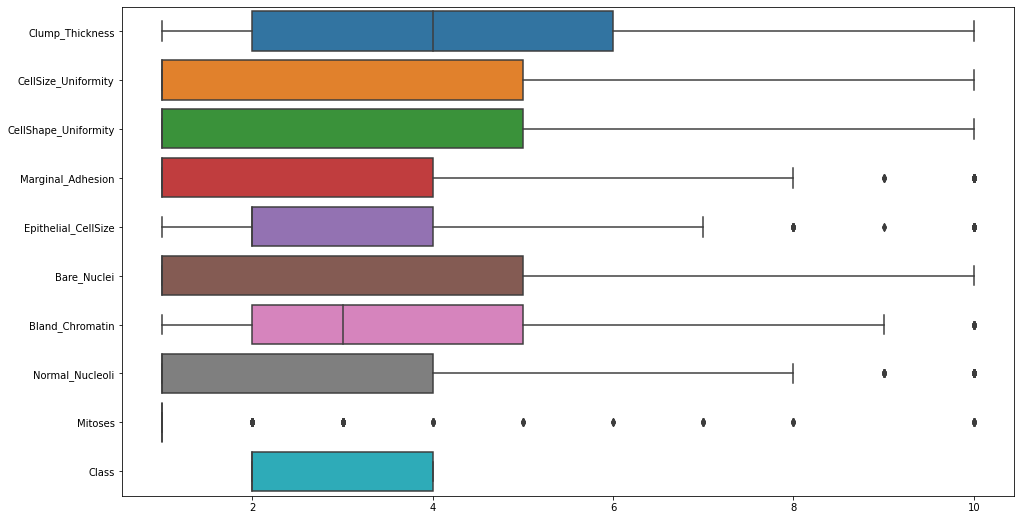

In [112]:
# We can also check the boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(data=data, orient='h');

Now, by examining this boxplot we do see that there are some outliers in the form of dots, but since the uniformity of this dataset is workable and it is not a super-big dataset, we are going to be okay for our next step of modeling.

Let us also check the correlation details to see how our target (Class column) is correlated with other data columns

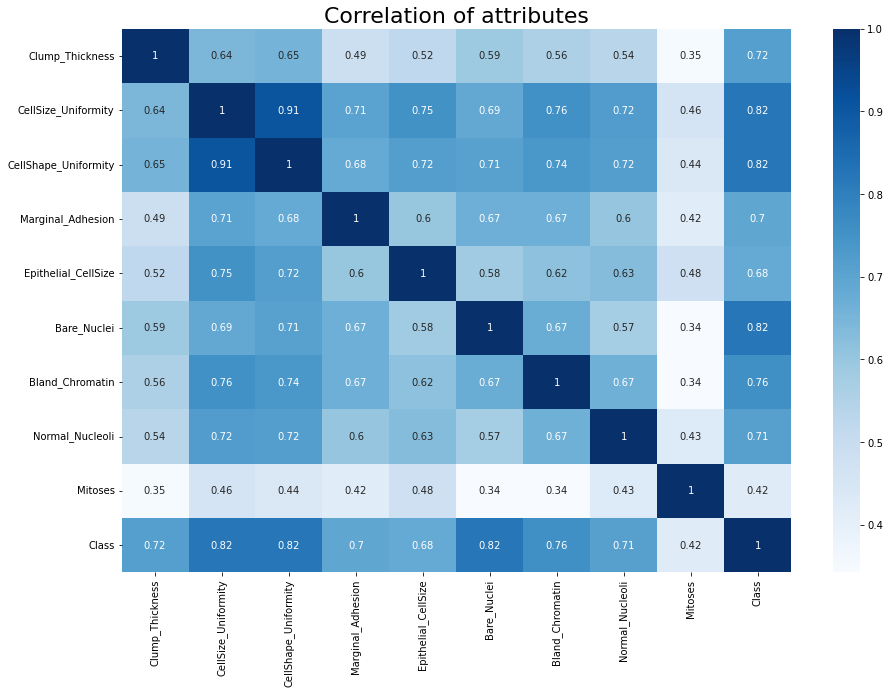

In [136]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Blues')
plt.title('Correlation of attributes', fontsize = 22)
plt.show()

Seems the "Class" column is satisfactorily correlated with all the data columns except the "Mitoses" attribute. 

It's quite a lucky situation for a data scientist to have such a dataset. Not all datasets out there are in such a good shape though, but that is a story for another day. Let's concentrate on this one for the time being. 

### Model Building

In [138]:
# Check the data again.
data.head()
# it's a good practice to check the data everytime we change course, to see if during our processing data is intact or not. Just a qick glance. 

,Clump_Thickness,CellSize_Uniformity,CellShape_Uniformity,Marginal_Adhesion,Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


To build a model, a good practice is to separate (if possible) the data into x and y 

In [139]:
X = data.drop("Class", axis=1)

y = data["Class"]

In [141]:
# let us split our data in 75:25 train:test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

<h2>
K-Nearest Neighbor Classifier
</h2>

Let us first start with KNN classifier. 

In [149]:
# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
# choosing the weight is very important in KNN algorithm. It defines how much the nearer neighbors are going to influence the outcome compared to the farther ones. The Weight "distance" going as the inverse of the distance. That means farther the neighbor less influential it will be in the outcome.  

In [150]:
# fit the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [188]:
# predict the values
y_pred1 = knn_model.predict(X_test)
y_pred1

array([4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2],
      dtype=int64)

In [159]:
print("The prediction score of KNN algorithm is {0:.2g}%".format(knn_model.score(X_test, y_test)*100))

The prediction score of KNN algorithm is 98%


<h2>
Support-Vector Machine Classifier
</h2>

Let us use the Support-Vector Classifier

In [178]:
# Initialize the model 
svc_model = SVC(C=3, gamma=0.025)

In [185]:
# Fit the model
svc_model.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [186]:
# predict the values
y_pred2 = svc_model.predict(X_test)
y_pred2

array([4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2],
      dtype=int64)

In [187]:
print("The prediction score of SVM algorithm is {0:.2g}%".format(svc_model.score(X_test, y_test)*100))

The prediction score of SVM algorithm is 97%


### Comparing the two ML models

let us make a dataframe with the two predictions y_pred1 and y_pred2 from the two classifiers

In [190]:
data_comp = pd.DataFrame({"KNNpred":y_pred1, "SVCpred":y_pred2})
data_comp.head()

,KNNpred,SVCpred
0,4,4
1,2,2
2,2,2
3,2,2
4,4,4


In [202]:
# Let's get the classification reports for the two models 
print("KNN classification report")
print("***"*20)
print(classification_report(y_test, y_pred1)) 

KNN classification report
************************************************************
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       107
           4       0.97      0.97      0.97        68

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



In [201]:
print("SVM classification report")
print("***"*20)
print(classification_report(y_test, y_pred2))

SVM classification report
************************************************************
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       107
           4       0.94      0.97      0.96        68

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



Confusion matrix for KNN model


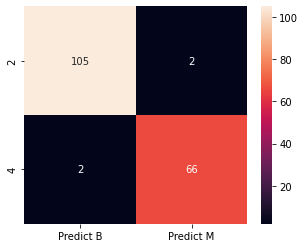

In [213]:
print("Confusion matrix for KNN model")

cm = confusion_matrix(y_test, y_pred1, labels=[2, 4])
cm
# we need to create a dataframe from this matrix
data_cm = pd.DataFrame(cm, index=[2, 4], columns=['Predict B', 'Predict M'])

plt.figure(figsize=(5,4))
sns.heatmap(data_cm, annot=True, fmt='.0f');

Confusion matrix for SVC model


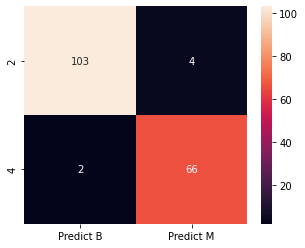

In [216]:
print("Confusion matrix for SVC model")

cm = confusion_matrix(y_test, y_pred2, labels=[2, 4])
cm
# we need to create a dataframe from this matrix
data_cm = pd.DataFrame(cm, index=[2, 4], columns=['Predict B', 'Predict M'])

plt.figure(figsize=(5, 4))
sns.heatmap(data_cm, annot=True, fmt='.0f');

So, we see that the KNN model gives 105 True Positive and 66 True negative predictions, along with 2 false positive and 2 false negative predictions. 

On the other hand, SVC model gives only 103 true positive and 66 true negative predictions, along with 2 false positive and 4 false negative predictions. 

Apparently, KNN model seems better that the SVC model. So we are going to suggest KNN model to Dr. Wolberg and the team. 